# Step 1: Load and Explore the Dataset

First few rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Categorical Columns: ['sex', 'smoker', 

/home/para/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


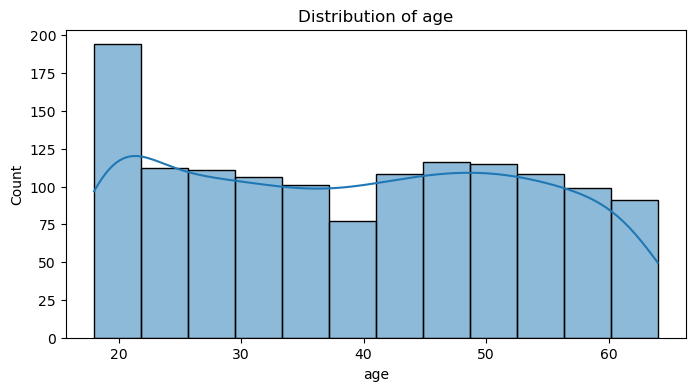

/home/para/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


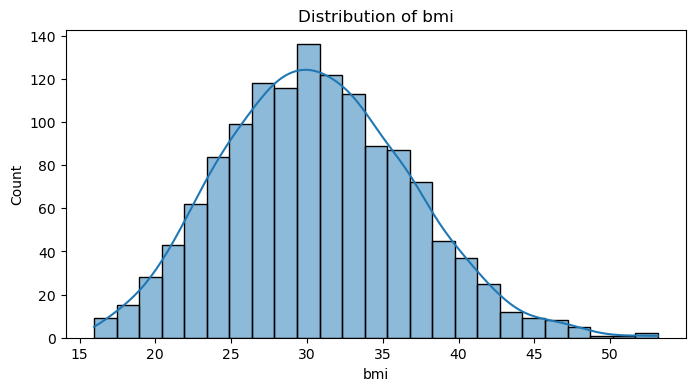

/home/para/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


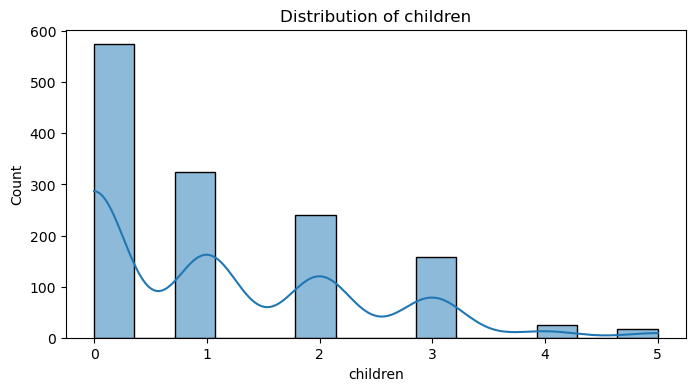

/home/para/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


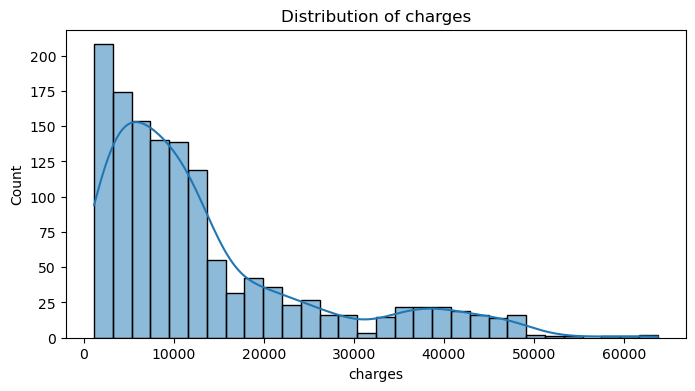

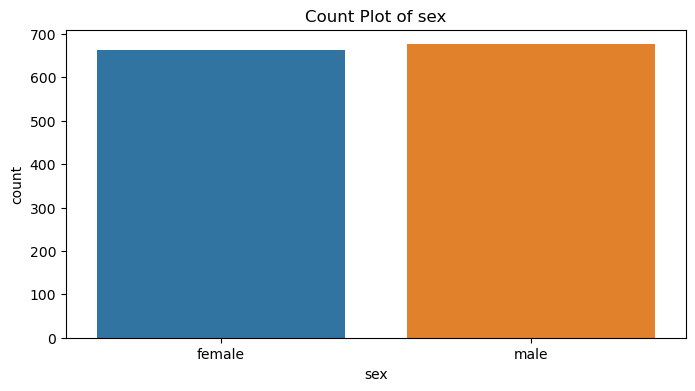

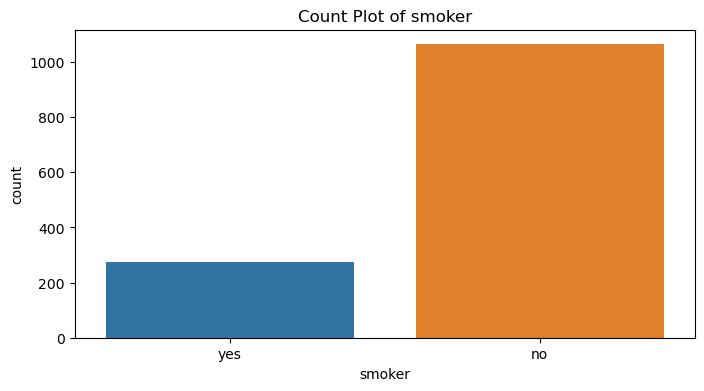

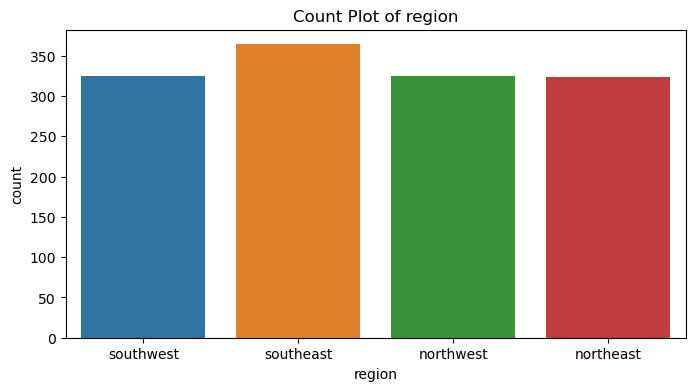

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'insurance.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Basic information about the dataset
print("\nBasic Information:")
print(data.info())

# Identify categorical and numerical features
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(exclude=['object']).columns.tolist()

print("\nCategorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

# Basic statistical summary of numerical features
print("\nStatistical Summary of Numerical Features:")
print(data[numerical_cols].describe())

# Distribution of numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Count plots for categorical features
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=data[col])
    plt.title(f'Count Plot of {col}')
    plt.show()


# Step 2: Data Preprocessing

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# Encoding categorical columns with specific mappings
data.replace({'sex': {'male': 0, 'female': 1}}, inplace=True)
data.replace({'smoker': {'yes': 0, 'no': 1}}, inplace=True)
data.replace({'region': {'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace=True)

# Identifying numerical columns (after encoding)
numerical_cols = ['age', 'bmi', 'children', 'sex', 'smoker', 'region']

# Fit the StandardScaler
numerical_data = data[numerical_cols]
numerical_transformer = StandardScaler().fit(numerical_data)

# Save the fitted scaler for later use
joblib.dump(numerical_transformer, 'numerical_scaler.pkl')

# Separating features and target variable
X = data[numerical_cols]
y = data['charges']

# Preprocessing the data
X_preprocessed = numerical_transformer.transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())
print("\n///////////////////////")
# Basic information about the dataset
print("\nBasic Information:")
print(data.info())

print("\n///////////////////////")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


First few rows of the dataset:
   age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       0       1  16884.92400
1   18    0  33.770         1       1       0   1725.55230
2   28    0  33.000         3       1       0   4449.46200
3   33    0  22.705         0       1       3  21984.47061
4   32    0  28.880         0       1       3   3866.85520

///////////////////////

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB
None

///////////////////////
Training set shape: (1070, 6)
Te

# Step 3: Build the Model

In [5]:
import tensorflow as tf

# Determine the number of input features
input_features = X_train.shape[1]

print("\n input_features  = ",input_features )
print("\n//////////////////////////////////////////\n")


# Building the Neural Network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(input_features,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Print the model summary
model.summary()



 input_features  =  6

//////////////////////////////////////////

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               896       
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11265 (44.00 KB)
Trainable params: 11265 (44.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Step 4: Compile the Model

In [6]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
print(model)


# Step 5: Train the Model

In [7]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100
27/27 [==============================] - 1s 7ms/step - loss: 325441312.0000 - mean_absolute_error: 13517.6885 - val_loss: 310284640.0000 - val_mean_absolute_error: 12652.5908
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 325219456.0000 - mean_absolute_error: 13510.3906 - val_loss: 309846240.0000 - val_mean_absolute_error: 12637.7217
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 324138880.0000 - mean_absolute_error: 13478.2617 - val_loss: 308023104.0000 - val_mean_absolute_error: 12579.4346
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 320511872.0000 - mean_absolute_error: 13370.0234 - val_loss: 302377248.0000 - val_mean_absolute_error: 12408.1533
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 310774912.0000 - mean_absolute_error: 13091.8975 - val_loss: 289066112.0000 - val_mean_absolute_error: 12015.0469
Epoch 6/100
27/27 [==============================] - 0s 3ms/step 

# Step 6: Plot Training History (Optional)

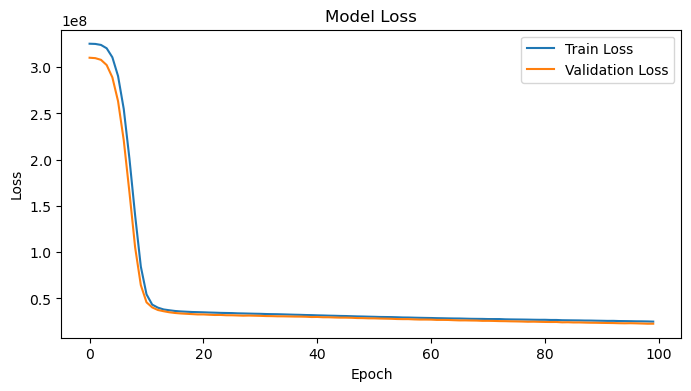

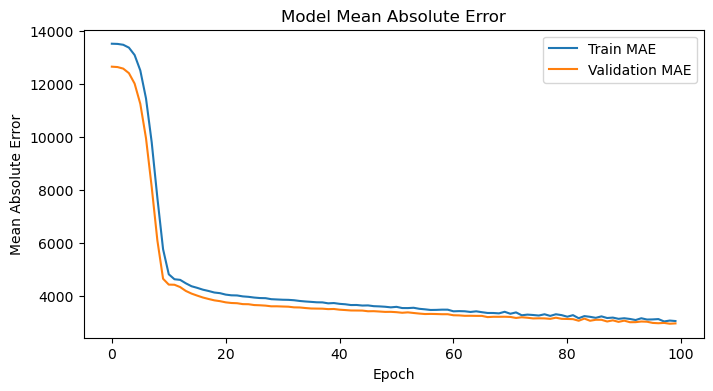

In [8]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend()
plt.show()


# Step 7: Evaluate the Model

In [9]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test Mean Absolute Error: {test_mae}")


Test Loss: 22218546.0
Test Mean Absolute Error: 3026.86669921875


# Step 8: Make Predictions

In [10]:
predictions = model.predict(X_test)

for i in range(10):
    print(f"Actual Value: {y_test.iloc[i]} - Predicted Value: {predictions[i][0]}")


9/9 [==============================] - 0s 1ms/step
Actual Value: 9095.06825 - Predicted Value: 9779.01953125
Actual Value: 5272.1758 - Predicted Value: 6728.24658203125
Actual Value: 29330.98315 - Predicted Value: 34790.74609375
Actual Value: 9301.89355 - Predicted Value: 10585.33984375
Actual Value: 33750.2918 - Predicted Value: 28653.611328125
Actual Value: 4536.259 - Predicted Value: 8042.02587890625
Actual Value: 2117.33885 - Predicted Value: 5320.11572265625
Actual Value: 14210.53595 - Predicted Value: 16733.26171875
Actual Value: 3732.6251 - Predicted Value: 6722.30810546875
Actual Value: 10264.4421 - Predicted Value: 11341.0703125


# Step 9: Save the Model

In [12]:
model.save('insurance_model.h5')
print("Model saved successfully.")


Model saved successfully.


# Step 10: Load the Model 


In [13]:
#loaded_model = tf.keras.models.load_model('insurance_model_2.h5')
#print("Model loaded successfully.")


# step 11 -predictions on my new input data

In [14]:

# Step 1: Define  Input Data
input_data = pd.DataFrame({
    'age': [29],
    'bmi': [27.9],
    'children': [2],
    'sex': [0],  # Male
    'smoker': [0],  # Smoker
    'region': [2]  # Northeast
})

# step 2 : Load the Fitted Scaler and Preprocess the Input Data
# Load the saved scaler
numerical_transformer = joblib.load('numerical_scaler.pkl')

# Preprocess the input data
input_preprocessed = numerical_transformer.transform(input_data)

# step 3 : Load the Model and Make Predictions

# Load the saved model
loaded_model = tf.keras.models.load_model('insurance_model.h5')

# Make predictions
predicted_cost = loaded_model.predict(input_preprocessed)
print(f"Predicted Insurance Cost: {predicted_cost[0][0]}")




1/1 [==============================] - 0s 61ms/step
Predicted Insurance Cost: 25807.826171875
